In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression:
    
    def __init__(self, num_iterations=500, learning_rate=0.01):
        self.n_iter = num_iterations
        self.lr = learning_rate
    
    
    def _init_params(self, n_features):
        '''
        This function creates a vector of zeros of shape (n_features, 1) for w and initializes b to 0
        '''
        self.w_ = np.zeros((n_features, 1))
        self.b_ = 0
    
    
    def _calc_cost(self, X, y):
        '''
        This function calculates cost
        X.shape: (n_samples, n_features)
        y.shape: (n_samples, 1)
        '''
        m = X.shape[0]
        y_hat = np.dot(X, self.w_) + self.b_
        cost = np.dot((y_hat - y).T, y_hat - y) / (2*m)
        return cost, y_hat
    
    
    def fit(self, X_train, y_train):
        '''
        This function optimizes parameter vector w and bias b by running a gradient descent algorithm
        X_train.shape: (n_samples, n_features)
        y_train.shape: (n_samples, 1)
        '''
        n_features = X_train.shape[1]
        n_samples = X_train.shape[0]
        self._init_params(n_features)
        
        self.costs_ = []
        
        for i in range(self.n_iter):
            
            cost, y_hat = self._calc_cost(X_train, y_train)
            
            dw = np.dot(X_train.T, (y_hat - y_train)) / n_samples
            db = np.sum(y_hat - y_train) / n_samples
            
            self.w_ -= self.lr * dw
            self.b_ -= self.lr * db
            
            #write cost every 100 iterations
            if i % 100 == 0:
                self.costs_.append(np.squeeze(cost))
    
    
    def predict(self, X_test):
        '''
        Make a prediction using learned parameters w and b
        '''
        y_hat = np.dot(X_test, self.w_) + self.b_
        return y_hat

In [3]:
#function to compute RMSE
def rmse(y_hat, y):
    return np.sqrt(np.mean((y_hat - y) ** 2))

In [4]:
#function to load data
def load_data(test_size=0.3):
    from sklearn.datasets import load_diabetes
    from sklearn.model_selection import train_test_split
    
    diabetes = load_diabetes()
    
    X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, 
                                                        test_size=test_size, random_state=17)
    return X_train, X_test, y_train[:,np.newaxis], y_test[:,np.newaxis]

In [5]:
#load data to test implementation 
X_train, X_test, y_train, y_test = load_data()

#explore shapes of obtained arrays
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (309, 10)
X_test.shape: (133, 10)
y_train.shape: (309, 1)
y_test.shape: (133, 1)


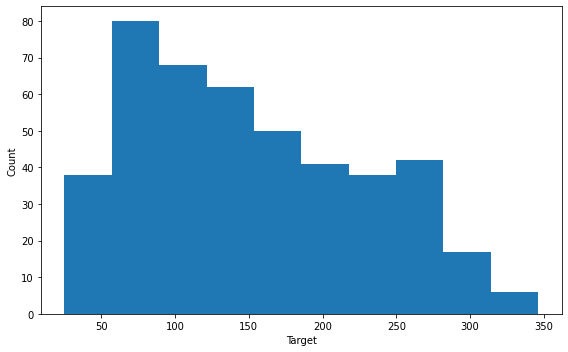

In [6]:
#histogram of the quantity we want to predict
plt.figure(figsize=(8, 5))
plt.hist(np.r_[y_train, y_test])
plt.xlabel("Target")
plt.ylabel("Count")
plt.tight_layout()

In [7]:
#train model with num_iterations=5000 and learning_rate=0.001
lin_reg = LinearRegression(num_iterations=5000, learning_rate=0.001)
lin_reg.fit(X_train, y_train)

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


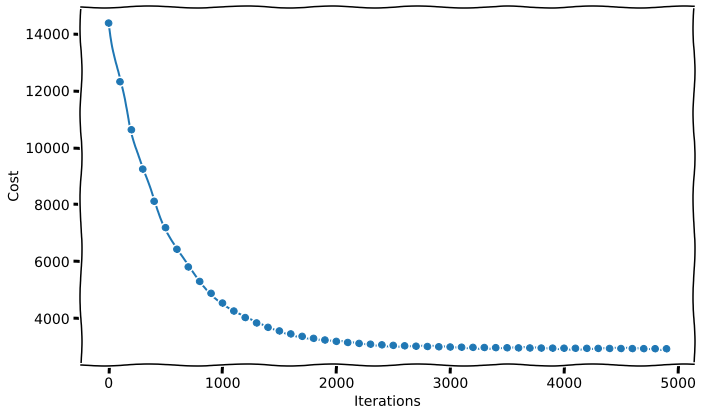

In [8]:
#plot costs
plt.figure(figsize=(10, 6))
with plt.xkcd():
    plt.plot(np.arange(0, 5000, 100), lin_reg.costs_, marker='o')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.tight_layout()

In [9]:
#print train/test rmse
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

print(f'Train RMSE: {rmse(y_train_pred, y_train)}')
print(f'Test RMSE: {rmse(y_test_pred, y_test)}')

Train RMSE: 76.45000105569413
Test RMSE: 74.42499870818315


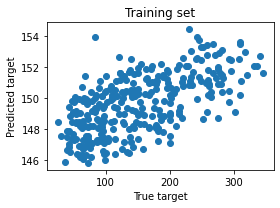

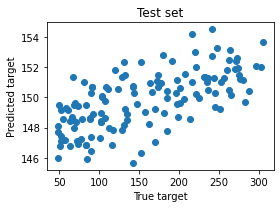

In [10]:
#plot predictions versus true values
plt.figure(figsize=(4, 3))
plt.title("Training set")
plt.scatter(y_train, y_train_pred)
plt.xlabel("True target")
plt.ylabel("Predicted target")
plt.tight_layout()

plt.figure(figsize=(4, 3))
plt.title("Test set")
plt.scatter(y_test, y_test_pred)
plt.xlabel("True target")
plt.ylabel("Predicted target")
plt.tight_layout()

In [11]:
#calculate parameters via Normal Equation(intercept term is not included in calculation)
out_prod_inv = np.linalg.inv(np.dot(X_train.T, X_train))
w = np.dot(out_prod_inv.dot(X_train.T), y_train)

#make predictions on train/test data
y_train_pred = X_train @ w
y_test_pred = X_test @ w

#print train/test rmse
print(f'Train RMSE: {rmse(y_train_pred, y_train)}')
print(f'Test RMSE: {rmse(y_test_pred, y_test)}')

Train RMSE: 160.4588129263892
Test RMSE: 165.65544967860112
